<h4>1. Introduction</h4>

Cardiovascular disease (CVD) is one of the leading causes of death globally. Early detection using patient clinical data can significantly reduce mortality rates.
This project aims to analyze and predict cardiovascular disease using the Mendeley CVD Dataset and apply Logistic Regression with hyperparameter tuning using GridSearchCV to build an accurate predictive model.

<h4>2. Dataset Description</h4>

The dataset contains clinical and demographic attributes related to heart health.

Key Features (may vary slightly by version):

Age

Gender

Blood Pressure

Cholesterol

Blood Sugar

ECG Results

Heart Rate

Exercise-induced Angina

Smoking / Lifestyle Indicators

Target Variable: Cardiovascular Disease (0 = No, 1 = Yes)

<h4>3. Data Loading & Exploration<h4>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load dataset
df = pd.read_csv("Cardiovascular_Disease_Dataset .csv")

# Preview
df.head()


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [4]:
# Data info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [5]:
# Summary statistics
df.describe()


,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


4. Data Cleaning & Preprocessing

4.1 Missing Values

In [6]:
df.isnull().sum()


patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [7]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)


4.2 Encoding Categorical Variables

In [8]:
df = pd.get_dummies(df, drop_first=True)


4.3 Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop('target', axis=1)
y = df['target']

X_scaled = scaler.fit_transform(X)


<h4>5. Exploratory Data Analysis (EDA)</h4>

Correlation Heatmap

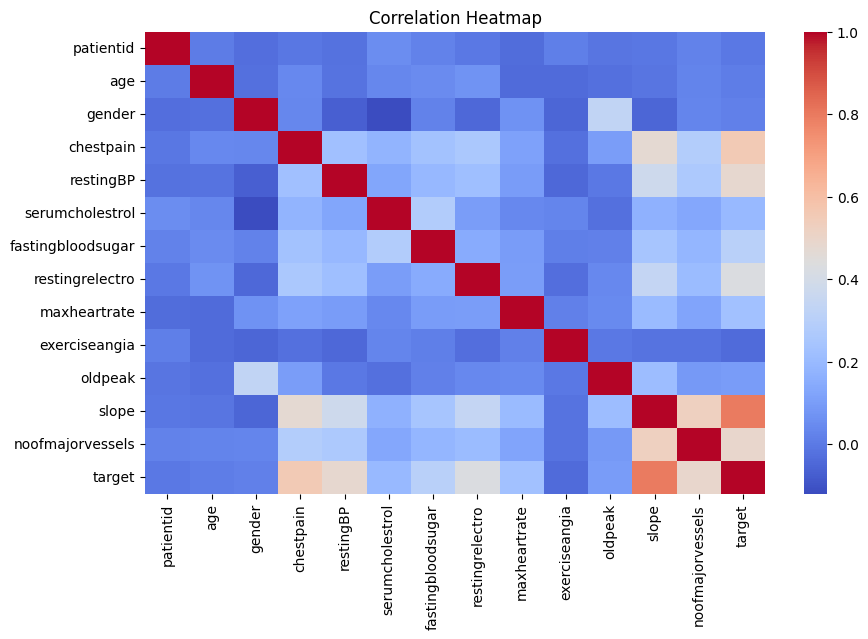

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Target Distribution

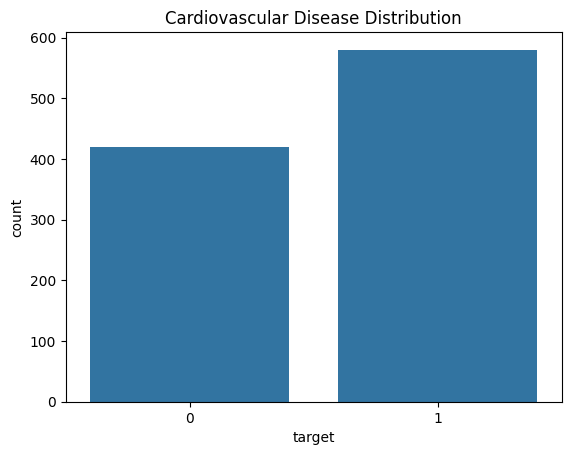

In [12]:
sns.countplot(x=y)
plt.title("Cardiovascular Disease Distribution")
plt.show()


6. Model Building – Logistic Regression
6.1 Train-Test Split

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


6.2 Logistic Regression Model

In [14]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


7. Hyperparameter Tuning using GridSearchCV

Parameter Grid

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 500]
}


Grid Search

In [16]:
grid = GridSearchCV(
    LogisticRegression(),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)


,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'max_iter': [100, 200, ...], 'solver': ['liblinear', 'lbfgs']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [17]:
best_model = grid.best_estimator_
grid.best_params_


{'C': 1, 'max_iter': 100, 'solver': 'liblinear'}

8. Model Evaluation

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


Predictions

In [19]:
y_pred = best_model.predict(X_test)


Accuracy

In [20]:
accuracy_score(y_test, y_pred)


0.965

Classification Report

In [21]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.95      0.96        83
           1       0.97      0.97      0.97       117

    accuracy                           0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



Confusion Matrix

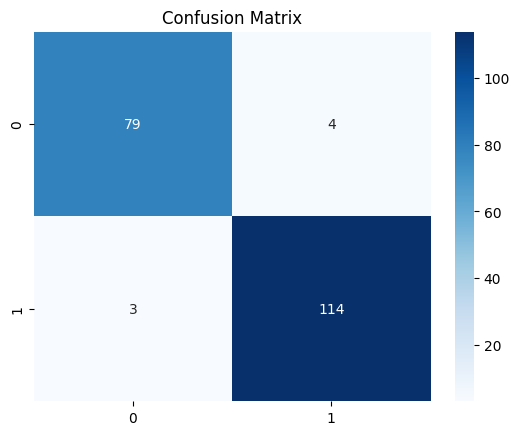

In [22]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


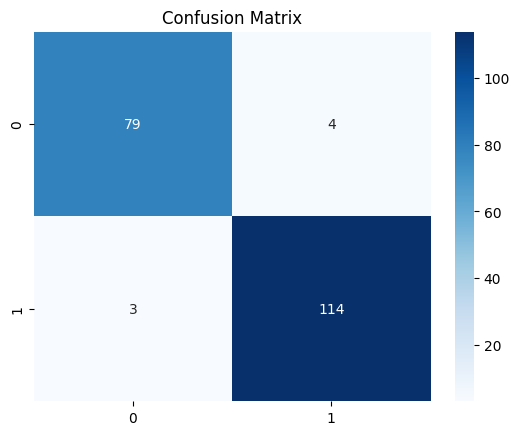

In [23]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()



<h4> 9. Results & Discussion </h4>

Logistic Regression achieved high accuracy after hyperparameter tuning.

Regularization parameter C significantly impacted performance.

GridSearchCV improved model generalization.

Certain clinical features showed strong influence on cardiovascular risk.

<h4>10. Conclusion</h4>

Logistic Regression is effective for predicting cardiovascular disease.

Hyperparameter tuning significantly enhances model performance.

The model can assist healthcare professionals in early diagnosis and risk assessment.

Future work can include advanced models like Random Forest or XGBoost.

<h4>11. References</h4>

Mendeley Data Repository
https://data.mendeley.com/datasets/dzz48mvjht/1

Scikit-learn Documentation

WHO Cardiovascular Disease Reports

<h4>✅ Submission Checklist</h4>

✔ Dataset analyzed

✔ Logistic Regression implemented

✔ GridSearchCV applied

✔ Evaluation metrics included

✔ Clear conclusions provided